In [147]:
pip install mylib

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for mylib: filename=mylib-0.0.1-py3-none-any.whl size=1015 sha256=a2f0b58bacf1e30ee2c1f01a4bae092e311fdc51b06dfd6c1b836006183c0204
  Stored in directory: /home/ni/.cache/pip/wheels/ce/73/de/1bb6815e9b4af0eb7707e748eacebf12db544f50b76a9229e7
Successfully built mylib
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [150]:
import glob
import pandas as pd
import numpy as np
from numpy import mean
from numpy import ravel
from numpy import log

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV


import catboost as cat
from catboost import CatBoostRegressor

from catboost import Pool, cv

from matplotlib import pyplot
import seaborn as sns

## Pulling weather

In [104]:
%pip install wwo-hist

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [105]:
from wwo_hist import retrieve_hist_data

In [151]:
frequency = 24
start_date = '13-FEB-2019'
end_date = '27-JUN-2021'
api_key = '46878fa0d2234ddebdb115249212606'
location_list = [
# 'Syktyvkar',
# 'Sevastopol',
# 'Perm',
# 'Chelyabinsk',
# 'Moscow',
# 'Vladimir',
# 'Smolensk',
# 'Tula',
# 'Orel',
# 'Orenburg',
# 'Samara',
# 'Saratov',
# 'Tyumen',
# 'Bryansk',
# 'Penza',
# 'Kemerovo',
# 'Krasnodar',
# 'Barnaul',
# 'Izhevsk',
# 'Astrakhan',
# 'Nalchik',
# 'Vladivostok',
# 'Irkutsk',
# 'Birobidzhan',
# 'Grozny',
# 'Moscow',
# 'Lipetsk',
# 'Kaliningrad',
# 'Krasnoyarsk',
# 'Yaroslavl',
# 'Rostov-on-Don',
# 'Ryazan',
# 'Nizhny_Novgorod',
# 'Kurgan',
# 'Belgorod',
# 'Khanty-Mansiysk',
# 'Cheboksary',
# 'Kazan',
# 'Ufa',
# 'Kyzyl',
# 'Volgograd',
# 'Simferopol',
# 'Salekhard',
# 'Maykop',
# 'St_Petersburg',
# 'Kirov',
# 'Novosibirsk',
# 'Yekaterinburg',
# 'Kursk',
# 'Vladikavkaz',
# 'Kaluga',
# 'Stavropol',
# 'Kostroma',
# 'Abakan',
# 'Ulyanovsk',
# 'Voronezh',
# 'Ivanovo',
# 'Tambov',
# 'Tomsk',
# 'Khabarovsk',
# 'Chita',
# 'Tver',
# 'Saransk',
# 'Omsk',
# 'Makhachkala',
# 'Gorno-Altaysk',
# 'Yuzhno-Sakhalinsk'
# 'Cheboksary'
                ]

hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)



Retrieving weather data for Cheboksary


Currently retrieving data for Cheboksary: from 2019-02-13 to 2019-02-28
Time elapsed (hh:mm:ss.ms) 0:00:00.807798
Currently retrieving data for Cheboksary: from 2019-03-01 to 2019-03-31
Time elapsed (hh:mm:ss.ms) 0:00:01.586990
Currently retrieving data for Cheboksary: from 2019-04-01 to 2019-04-30
Time elapsed (hh:mm:ss.ms) 0:00:02.527460
Currently retrieving data for Cheboksary: from 2019-05-01 to 2019-05-31
Time elapsed (hh:mm:ss.ms) 0:00:03.776831
Currently retrieving data for Cheboksary: from 2019-06-01 to 2019-06-30
Time elapsed (hh:mm:ss.ms) 0:00:04.557716
Currently retrieving data for Cheboksary: from 2019-07-01 to 2019-07-31
Time elapsed (hh:mm:ss.ms) 0:00:05.634138
Currently retrieving data for Cheboksary: from 2019-08-01 to 2019-08-31
Time elapsed (hh:mm:ss.ms) 0:00:06.523403
Currently retrieving data for Cheboksary: from 2019-09-01 to 2019-09-30
Time elapsed (hh:mm:ss.ms) 0:00:07.337321
Currently retrieving data for Cheboksary: fro

In [152]:
path = r'/home/ni/My Projects/BCG_GAMMA/city_weather'

In [153]:
files = glob.glob(path + '/*.csv')

In [154]:
combined = pd.DataFrame()
for i in files:
  file = pd.read_csv(i)
  combined = pd.concat([combined, file])

In [155]:
combined.reset_index(inplace=True)

In [156]:
del combined['index']

In [157]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57090 entries, 0 to 57089
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          57090 non-null  object 
 1   maxtempC           57090 non-null  int64  
 2   mintempC           57090 non-null  int64  
 3   totalSnow_cm       57090 non-null  float64
 4   sunHour            57090 non-null  float64
 5   uvIndex            57090 non-null  int64  
 6   moon_illumination  57090 non-null  int64  
 7   moonrise           57090 non-null  object 
 8   moonset            57090 non-null  object 
 9   sunrise            57090 non-null  object 
 10  sunset             57090 non-null  object 
 11  DewPointC          57090 non-null  int64  
 12  FeelsLikeC         57090 non-null  int64  
 13  HeatIndexC         57090 non-null  int64  
 14  WindChillC         57090 non-null  int64  
 15  WindGustKmph       57090 non-null  int64  
 16  cloudcover         570

In [158]:
combined

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2019-02-13,-12,-19,1.4,4.8,1,60,11:57 AM,02:40 AM,08:53 AM,...,22,100,94,1.7,1032,-12,5,207,14,Tomsk
1,2019-02-14,-9,-13,0.6,4.8,1,67,12:25 PM,03:58 AM,08:50 AM,...,20,96,94,0.7,1032,-9,6,202,14,Tomsk
2,2019-02-15,-7,-16,0.0,9.7,2,75,01:03 PM,05:15 AM,08:48 AM,...,24,42,92,0.0,1029,-7,9,197,14,Tomsk
3,2019-02-16,-6,-10,0.2,6.6,1,82,01:54 PM,06:26 AM,08:46 AM,...,30,74,88,0.2,1018,-6,10,202,19,Tomsk
4,2019-02-17,-2,-6,3.9,4.9,1,90,03:02 PM,07:26 AM,08:43 AM,...,28,100,91,4.6,1011,-2,5,200,19,Tomsk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57085,2021-06-22,31,16,0.0,19.8,7,87,06:18 PM,12:39 AM,01:51 AM,...,11,20,58,0.0,1018,31,10,201,7,Syktyvkar
57086,2021-06-23,33,18,0.0,19.0,6,94,08:11 PM,12:46 AM,01:52 AM,...,10,57,72,7.4,1018,33,9,148,6,Syktyvkar
57087,2021-06-24,32,19,0.0,19.0,6,100,09:51 PM,01:01 AM,01:52 AM,...,14,46,64,3.6,1013,32,9,241,9,Syktyvkar
57088,2021-06-25,31,19,0.0,19.7,7,100,10:52 PM,01:37 AM,01:53 AM,...,16,29,62,0.7,1011,31,10,295,12,Syktyvkar


In [51]:
b = combined['location'].unique()
sorted(list(b), key=str)

['Абакан',
 'Астрахань',
 'Барнаул',
 'Белгород',
 'Биробиджан',
 'Брянск',
 'Владивосток',
 'Владикавказ',
 'Владимир',
 'Волгоград',
 'Воронеж',
 'Горно-Алтайск',
 'Грозный',
 'Екатеринбург',
 'Иваново',
 'Ижевск',
 'Иркутск',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров',
 'Кострома',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Кызыл',
 'Липецк',
 'Майкоп',
 'Махачкала',
 'Москва',
 'Нальчик',
 'Нижний Новгород',
 'Новосибирск',
 'Омск',
 'Орел',
 'Оренбург',
 'Пенза',
 'Пермь',
 'Ростов-на-Дону',
 'Рязань',
 'Салехард',
 'Самара',
 'Санкт-Петербург',
 'Саранск',
 'Саратов',
 'Севастополь',
 'Симферополь',
 'Смоленск',
 'Ставрополь',
 'Сыктывкар',
 'Тамбов',
 'Тверь',
 'Томск',
 'Тула',
 'Тюмень',
 'Ульяновск',
 'Уфа',
 'Хабаровск',
 'Ханты-Мансийск',
 'Челябинск',
 'Чита',
 'Южно-Сахалинск',
 'Ярославль']

In [180]:
rus_cities = [
'Абакан',
'Астрахань',
'Барнаул',
'Белгород',
'Биробиджан',
'Брянск',
'Челябинск',
'Чита',
'Горно-Алтайск',
'Грозный',
'Иркутск',
'Иваново',
'Ижевск',
'Калининград',
'Калуга',
'Казань',
'Кемерово',
'Хабаровск',
'Ханты-Мансийск',
'Киров',
'Кострома',
'Краснодар',
'Красноярск',
'Курган',
'Курск',
'Кызыл',
'Липецк',
'Махачкала',
'Майкоп',
'Москва',
'Нальчик',
'Нижний Новгород',
'Новосибирск',
'Омск',
'Орел',
'Оренбург',
'Пенза',
'Пермь',
'Ростов-на-Дону',
'Рязань',
'Салехард',
'Самара',
'Саранск',
'Саратов',
'Севастополь',
'Симферополь',
'Смоленск',
'Санкт-Петербург',
'Ставрополь',
'Сыктывкар',
'Тамбов',
'Томск',
'Тула',
'Тверь',
'Тюмень',
'Уфа',
'Ульяновск',
'Владикавказ',
'Владимир',
'Владивосток',
'Волгоград',
'Воронеж',
'Ярославль',
'Екатеринбург',
'Южно-Сахалинск',
'Чебоксары']

In [181]:
len(rus_cities)

66

In [185]:
len(eng_cities)

66

In [184]:
eng_cities = [
     'Abakan',
 'Astrakhan',
 'Barnaul',
 'Belgorod',
 'Birobidzhan',
 'Bryansk',
 'Chelyabinsk',
 'Chita',
 'Gorno-Altaysk',
 'Grozny',
 'Irkutsk',
 'Ivanovo',
 'Izhevsk',
 'Kaliningrad',
 'Kaluga',
 'Kazan',
 'Kemerovo',
 'Khabarovsk',
 'Khanty-Mansiysk',
 'Kirov',
 'Kostroma',
 'Krasnodar',
 'Krasnoyarsk',
 'Kurgan',
 'Kursk',
 'Kyzyl',
 'Lipetsk',
 'Makhachkala',
 'Maykop',
 'Moscow',
 'Nalchik',
 'Nizhny_Novgorod',
 'Novosibirsk',
 'Omsk',
 'Orel',
 'Orenburg',
 'Penza',
 'Perm',
 'Rostov-on-Don',
 'Ryazan',
 'Salekhard',
 'Samara',
 'Saransk',
 'Saratov',
 'Sevastopol',
 'Simferopol',
 'Smolensk',
 'St_Petersburg',
 'Stavropol',
 'Syktyvkar',
 'Tambov',
 'Tomsk',
 'Tula',
 'Tver',
 'Tyumen',
 'Ufa',
 'Ulyanovsk',
 'Vladikavkaz',
 'Vladimir',
 'Vladivostok',
 'Volgograd',
 'Voronezh',
 'Yaroslavl',
 'Yekaterinburg',
 'Yuzhno-Sakhalinsk',
 'Cheboksary'
]

In [186]:
for r, e in zip(rus_cities, eng_cities):
    combined['location'].replace(e, r, inplace=True)


In [187]:
a = df['Город'].unique()
sorted(list(a), key=str)

['Абакан',
 'Астрахань',
 'Барнаул',
 'Белгород',
 'Биробиджан',
 'Брянск',
 'Владивосток',
 'Владикавказ',
 'Владимир',
 'Волгоград',
 'Воронеж',
 'Горно-Алтайск',
 'Грозный',
 'Екатеринбург',
 'Иваново',
 'Ижевск',
 'Иркутск',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров',
 'Кострома',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Кызыл',
 'Липецк',
 'Майкоп',
 'Махачкала',
 'Москва',
 'Нальчик',
 'Нижний новгород',
 'Новосибирск',
 'Омск',
 'Орел',
 'Оренбург',
 'Пенза',
 'Пермь',
 'Ростов-на-Дону',
 'Рязань',
 'Салехард',
 'Самара',
 'Санкт-Петербург',
 'Саранск',
 'Саратов',
 'Севастополь',
 'Симферополь',
 'Смоленск',
 'Ставрополь',
 'Сыктывкар',
 'Тамбов',
 'Тверь',
 'Томск',
 'Тула',
 'Тюмень',
 'Ульяновск',
 'Уфа',
 'Хабаровск',
 'Ханты-Мансийск',
 'Чебоксары',
 'Челябинск',
 'Чита',
 'Южно-Сахалинск',
 'Ярославль']

In [188]:
combined.to_csv('/home/ni/My Projects/BCG_GAMMA/weather.csv')

### Final Data

In [3]:
train = pd.read_csv('/home/ni/My Projects/BCG_GAMMA/final_train.csv')
train

,Регион,Anaplasma Phagocytophillum(кач) ДНК,Borrelia burgdorferi s.l (кач) ДНК,Borrelia miyamotoi (кач) ДНК,Ehrlichia muris/chaffeеnsis(кач) ДНК,Вирус клещевого энцефалита(кач) РНК,Anaplasma Phagocytophillum(кач) ДНК positive,Borrelia burgdorferi s.l (кач) ДНК positive,Borrelia miyamotoi (кач) ДНК positive,Ehrlichia muris/chaffeеnsis(кач) ДНК positive,...,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,Mnth,Day,region_code
0,Адыгея Респ,0.0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,59,0.3,1005,34,10,222,4,7,30,0
1,Адыгея Респ,0.0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,59,0.0,1009,19,10,90,8,4,25,0
2,Адыгея Респ,0.0,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,65,0.0,1021,21,10,264,15,5,19,0
3,Адыгея Респ,0.0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,76,9.6,1006,25,9,257,10,8,1,0
4,Адыгея Респ,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,37,0.0,1014,28,10,74,11,8,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,Ярославская обл,0.0,2.0,0,0.0,2.0,0.0,50.0,0.0,0.0,...,79,2.5,1012,16,9,174,11,5,29,66
7740,Ярославская обл,0.0,3.0,0,0.0,3.0,0.0,0.0,0.0,0.0,...,58,0.0,1022,14,10,74,12,5,31,66
7741,Ярославская обл,0.0,1.0,0,0.0,2.0,0.0,100.0,0.0,0.0,...,67,0.1,1028,18,10,25,15,6,3,66
7742,Ярославская обл,0.0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,64,0.0,1031,20,10,71,11,6,4,66


In [4]:
train['churn_of_epidemic_districts'] = train['epidemic_region'] / train['region all']
train['churn_of_epidemic_districts'] = train['churn_of_epidemic_districts'].fillna(0)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7744 entries, 0 to 7743
Data columns (total 49 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Регион                                         7744 non-null   object 
 1   Anaplasma Phagocytophillum(кач) ДНК            7744 non-null   float64
 2   Borrelia burgdorferi s.l (кач) ДНК             7744 non-null   float64
 3   Borrelia miyamotoi (кач) ДНК                   7744 non-null   int64  
 4   Ehrlichia muris/chaffeеnsis(кач) ДНК           7744 non-null   float64
 5   Вирус клещевого энцефалита(кач) РНК            7744 non-null   float64
 6   Anaplasma Phagocytophillum(кач) ДНК positive   7744 non-null   float64
 7   Borrelia burgdorferi s.l (кач) ДНК positive    7744 non-null   float64
 8   Borrelia miyamotoi (кач) ДНК positive          7744 non-null   float64
 9   Ehrlichia muris/chaffeеnsis(кач) ДНК positive  7744 

# Model

In [197]:
test = pd.read_csv('/home/ni/My Projects/BCG_GAMMA/test_test.csv')
test

,date,Регион,region_code,Mnth,Day,region all,epidemic_region,activity_level_of_mite,percentage_of_mite,density,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2021-06-09,Адыгея Респ,0,6,9,0,0,1,10.0,59.44,...,18,10,7,66,0.0,1012,25,10,179,6
1,2021-06-10,Адыгея Респ,0,6,10,0,0,1,10.0,59.44,...,19,9,37,68,0.2,1012,24,10,224,6
2,2021-06-11,Адыгея Респ,0,6,11,0,0,1,10.0,59.44,...,19,9,41,77,4.1,1012,25,10,167,5
3,2021-06-12,Адыгея Респ,0,6,12,0,0,1,10.0,59.44,...,20,9,42,79,4.9,1013,26,10,99,6
4,2021-06-13,Адыгея Респ,0,6,13,0,0,1,10.0,59.44,...,20,10,47,83,7.2,1012,24,9,262,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2021-06-27,Челябинская обл,62,6,27,39,39,10,100.0,38.89,...,21,15,68,82,26.1,1010,26,9,202,9
1269,2021-06-27,Чеченская Респ,63,6,27,0,0,1,10.0,92.63,...,32,15,12,47,0.0,1008,37,10,287,11
1270,2021-06-27,Чувашская Респ,64,6,27,0,0,1,10.0,65.85,...,25,17,18,70,0.0,1013,31,10,271,11
1271,2021-06-27,Ямало-Ненецкий АО,65,6,27,0,0,1,10.0,0.71,...,11,13,78,58,2.2,1016,14,10,155,9


In [198]:
test['churn_of_epidemic_districts'] = test['epidemic_region'] / test['region all']
test['churn_of_epidemic_districts'] = test['churn_of_epidemic_districts'].fillna(0)

## Preparing Data for model

In [199]:
features = [
#     'churn_of_epidemic_districts',
    'maxtempC',
    'mintempC',
#     'totalSnow_cm',
#     'sunHour',
#     'uvIndex',
#     'moon_illumination',
#     'moonrise',
#     'moonset',
#     'sunrise',
#     'sunset',
#     'DewPointC',
#     'FeelsLikeC',
    'HeatIndexC',
    'WindChillC',
#     'WindGustKmph',
#     'cloudcover',
#     'humidity',
#     'precipMM',
#     'pressure',
    'tempC',
#     'visibility',
#     'winddirDegree',
#     'windspeedKmph',
#     'Ev_znmean',
#     'Biomean',
#     'anthropmea',
#     'mean_wage',
#     'density',
#     'percentage_of_mite',
#     'epidemic_region',
#     'region_all'

]

cat_features = [
    'Регион',
    'Mnth',
    'Day',
#     'date_time',
    'activity_level_of_mite'
    
    
    
]

targett = [
    'Anaplasma Phagocytophillum(кач) ДНК',
'Borrelia burgdorferi s.l (кач) ДНК',
'Borrelia miyamotoi (кач) ДНК',
'Ehrlichia muris/chaffeеnsis(кач) ДНК',
'Вирус клещевого энцефалита(кач) РНК',
'Anaplasma Phagocytophillum(кач) ДНК positive',
'Borrelia burgdorferi s.l (кач) ДНК positive',
'Borrelia miyamotoi (кач) ДНК positive',
'Ehrlichia muris/chaffeеnsis(кач) ДНК positive',
'Вирус клещевого энцефалита(кач) РНК positive'
]

target = train[targett]

In [200]:
scaler = StandardScaler()
normalised_train = scaler.fit_transform(train[features])
normalised_test = scaler.fit_transform(test[features])
# normalised_test = scaler.fit_transform(test_wo_log[features])

In [201]:
train_list = np.concatenate([normalised_train, train[cat_features].values], axis=1)
test_list = np.concatenate([normalised_test, test[cat_features].values], axis=1)
print(train_list.shape)
print(test_list.shape)

(7744, 9)
(1273, 9)


In [202]:
catboost_cat_features = np.arange(len(features), train_list.shape[1])
catboost_cat_features_test = np.arange(len(features), test_list.shape[1])

In [203]:
x_train, x_test, y_train, y_test = train_test_split(train_list, target, test_size=0.3, random_state=8)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5420, 9), (2324, 9), (5420, 10), (2324, 10))

## Training model

In [190]:
model = CatBoostRegressor(
    loss_function='MultiRMSE',
    bootstrap_type =  'Bernoulli',
    learning_rate =  0.075,
    max_depth =  7,
    num_trees =  888,
    reg_lambda =  40,
    subsample = 0.75,
    min_child_samples = 5
)

model.fit(x_train, y_train,
         cat_features=catboost_cat_features,
          eval_set=(x_test, y_test),
         use_best_model=True)

0:	learn: 69.9713603	test: 67.3821101	best: 67.3821101 (0)	total: 64.5ms	remaining: 57.2s
1:	learn: 67.9011646	test: 65.2110396	best: 65.2110396 (1)	total: 103ms	remaining: 45.7s
2:	learn: 66.2394015	test: 63.5182214	best: 63.5182214 (2)	total: 154ms	remaining: 45.4s
3:	learn: 64.3847295	test: 61.6101592	best: 61.6101592 (3)	total: 183ms	remaining: 40.4s
4:	learn: 63.0975874	test: 60.3697926	best: 60.3697926 (4)	total: 244ms	remaining: 43.1s
5:	learn: 61.7091311	test: 58.9528802	best: 58.9528802 (5)	total: 315ms	remaining: 46.3s
6:	learn: 60.3802027	test: 57.6366105	best: 57.6366105 (6)	total: 359ms	remaining: 45.2s
7:	learn: 59.3475560	test: 56.5883022	best: 56.5883022 (7)	total: 416ms	remaining: 45.8s
8:	learn: 58.1721428	test: 55.3953873	best: 55.3953873 (8)	total: 480ms	remaining: 46.8s
9:	learn: 57.1772805	test: 54.3820785	best: 54.3820785 (9)	total: 540ms	remaining: 47.4s
10:	learn: 56.1716632	test: 53.4107586	best: 53.4107586 (10)	total: 603ms	remaining: 48.1s
11:	learn: 55.2482

92:	learn: 40.6964690	test: 39.7322077	best: 39.7322077 (92)	total: 5.51s	remaining: 47.1s
93:	learn: 40.6956937	test: 39.7321719	best: 39.7321719 (93)	total: 5.54s	remaining: 46.8s
94:	learn: 40.6947824	test: 39.7328524	best: 39.7321719 (93)	total: 5.55s	remaining: 46.3s
95:	learn: 40.6602722	test: 39.7236279	best: 39.7236279 (95)	total: 5.61s	remaining: 46.3s
96:	learn: 40.6013847	test: 39.7060933	best: 39.7060933 (96)	total: 5.68s	remaining: 46.3s
97:	learn: 40.6011016	test: 39.7061084	best: 39.7060933 (96)	total: 5.7s	remaining: 45.9s
98:	learn: 40.5718989	test: 39.6913359	best: 39.6913359 (98)	total: 5.76s	remaining: 45.9s
99:	learn: 40.5243350	test: 39.6733935	best: 39.6733935 (99)	total: 5.83s	remaining: 45.9s
100:	learn: 40.4695009	test: 39.6558814	best: 39.6558814 (100)	total: 5.9s	remaining: 45.9s
101:	learn: 40.4666077	test: 39.6559458	best: 39.6558814 (100)	total: 5.91s	remaining: 45.5s
102:	learn: 40.4351753	test: 39.6594288	best: 39.6558814 (100)	total: 5.99s	remaining: 4

182:	learn: 39.3798052	test: 39.5030768	best: 39.4883432 (177)	total: 12.3s	remaining: 47.5s
183:	learn: 39.3611912	test: 39.4944738	best: 39.4883432 (177)	total: 12.4s	remaining: 47.6s
184:	learn: 39.3415306	test: 39.4930763	best: 39.4883432 (177)	total: 12.5s	remaining: 47.6s
185:	learn: 39.3393459	test: 39.4931160	best: 39.4883432 (177)	total: 12.6s	remaining: 47.5s
186:	learn: 39.3356490	test: 39.4931747	best: 39.4883432 (177)	total: 12.7s	remaining: 47.5s
187:	learn: 39.3198097	test: 39.4782791	best: 39.4782791 (187)	total: 12.7s	remaining: 47.5s
188:	learn: 39.3016647	test: 39.4798179	best: 39.4782791 (187)	total: 12.8s	remaining: 47.5s
189:	learn: 39.2756653	test: 39.4654697	best: 39.4654697 (189)	total: 12.9s	remaining: 47.6s
190:	learn: 39.2719332	test: 39.4647430	best: 39.4647430 (190)	total: 13s	remaining: 47.6s
191:	learn: 39.2585092	test: 39.4598031	best: 39.4598031 (191)	total: 13.1s	remaining: 47.6s
192:	learn: 39.2578097	test: 39.4594258	best: 39.4594258 (192)	total: 13

272:	learn: 38.2864948	test: 39.3118513	best: 39.3118513 (272)	total: 20.3s	remaining: 45.7s
273:	learn: 38.2623092	test: 39.3001860	best: 39.3001860 (273)	total: 20.4s	remaining: 45.6s
274:	learn: 38.2561175	test: 39.3011575	best: 39.3001860 (273)	total: 20.5s	remaining: 45.6s
275:	learn: 38.2506966	test: 39.2998873	best: 39.2998873 (275)	total: 20.5s	remaining: 45.6s
276:	learn: 38.2486582	test: 39.3003679	best: 39.2998873 (275)	total: 20.6s	remaining: 45.5s
277:	learn: 38.2295249	test: 39.2931027	best: 39.2931027 (277)	total: 20.7s	remaining: 45.5s
278:	learn: 38.2154675	test: 39.2926016	best: 39.2926016 (278)	total: 20.8s	remaining: 45.5s
279:	learn: 38.2076496	test: 39.2978167	best: 39.2926016 (278)	total: 20.9s	remaining: 45.5s
280:	learn: 38.1795271	test: 39.3030008	best: 39.2926016 (278)	total: 21.1s	remaining: 45.5s
281:	learn: 38.1779025	test: 39.3034186	best: 39.2926016 (278)	total: 21.1s	remaining: 45.4s
282:	learn: 38.1511563	test: 39.2880848	best: 39.2880848 (282)	total: 

361:	learn: 37.2668778	test: 39.2592922	best: 39.2430855 (290)	total: 28.6s	remaining: 41.5s
362:	learn: 37.2658676	test: 39.2593584	best: 39.2430855 (290)	total: 28.7s	remaining: 41.5s
363:	learn: 37.2612992	test: 39.2596238	best: 39.2430855 (290)	total: 28.8s	remaining: 41.4s
364:	learn: 37.2549560	test: 39.2553401	best: 39.2430855 (290)	total: 28.9s	remaining: 41.4s
365:	learn: 37.2431627	test: 39.2603574	best: 39.2430855 (290)	total: 29s	remaining: 41.3s
366:	learn: 37.2392190	test: 39.2601194	best: 39.2430855 (290)	total: 29.1s	remaining: 41.3s
367:	learn: 37.2258993	test: 39.2592972	best: 39.2430855 (290)	total: 29.2s	remaining: 41.2s
368:	learn: 37.2253296	test: 39.2594295	best: 39.2430855 (290)	total: 29.3s	remaining: 41.2s
369:	learn: 37.2249279	test: 39.2594945	best: 39.2430855 (290)	total: 29.4s	remaining: 41.1s
370:	learn: 37.2071164	test: 39.2530762	best: 39.2430855 (290)	total: 29.4s	remaining: 41s
371:	learn: 37.1850296	test: 39.2493191	best: 39.2430855 (290)	total: 29.6

450:	learn: 36.4173712	test: 39.2443521	best: 39.2417619 (449)	total: 36.6s	remaining: 35.5s
451:	learn: 36.4168154	test: 39.2443491	best: 39.2417619 (449)	total: 36.7s	remaining: 35.4s
452:	learn: 36.4036715	test: 39.2425845	best: 39.2417619 (449)	total: 36.8s	remaining: 35.3s
453:	learn: 36.3782429	test: 39.2390378	best: 39.2390378 (453)	total: 36.9s	remaining: 35.3s
454:	learn: 36.3746035	test: 39.2391620	best: 39.2390378 (453)	total: 37s	remaining: 35.2s
455:	learn: 36.3724874	test: 39.2441876	best: 39.2390378 (453)	total: 37s	remaining: 35.1s
456:	learn: 36.3569729	test: 39.2459873	best: 39.2390378 (453)	total: 37.1s	remaining: 35s
457:	learn: 36.3437031	test: 39.2434884	best: 39.2390378 (453)	total: 37.2s	remaining: 34.9s
458:	learn: 36.3379468	test: 39.2421424	best: 39.2390378 (453)	total: 37.3s	remaining: 34.9s
459:	learn: 36.3256369	test: 39.2391845	best: 39.2390378 (453)	total: 37.4s	remaining: 34.8s
460:	learn: 36.3225986	test: 39.2385606	best: 39.2385606 (460)	total: 37.5s	

541:	learn: 35.5740581	test: 39.1954951	best: 39.1878278 (518)	total: 44.8s	remaining: 28.6s
542:	learn: 35.5633791	test: 39.1946972	best: 39.1878278 (518)	total: 44.9s	remaining: 28.5s
543:	learn: 35.5621237	test: 39.1947059	best: 39.1878278 (518)	total: 45s	remaining: 28.4s
544:	learn: 35.5444791	test: 39.1907988	best: 39.1878278 (518)	total: 45.1s	remaining: 28.4s
545:	learn: 35.5419758	test: 39.1929157	best: 39.1878278 (518)	total: 45.2s	remaining: 28.3s
546:	learn: 35.5228160	test: 39.1935873	best: 39.1878278 (518)	total: 45.2s	remaining: 28.2s
547:	learn: 35.5114897	test: 39.1870381	best: 39.1870381 (547)	total: 45.3s	remaining: 28.1s
548:	learn: 35.5093426	test: 39.1869646	best: 39.1869646 (548)	total: 45.4s	remaining: 28s
549:	learn: 35.5081800	test: 39.1902370	best: 39.1869646 (548)	total: 45.5s	remaining: 28s
550:	learn: 35.5051963	test: 39.1904783	best: 39.1869646 (548)	total: 45.6s	remaining: 27.9s
551:	learn: 35.4938628	test: 39.1954275	best: 39.1869646 (548)	total: 45.7s	

631:	learn: 34.8666094	test: 39.1570815	best: 39.1471375 (610)	total: 53.4s	remaining: 21.6s
632:	learn: 34.8657296	test: 39.1568306	best: 39.1471375 (610)	total: 53.5s	remaining: 21.5s
633:	learn: 34.8582263	test: 39.1552411	best: 39.1471375 (610)	total: 53.6s	remaining: 21.5s
634:	learn: 34.8476455	test: 39.1508917	best: 39.1471375 (610)	total: 53.6s	remaining: 21.4s
635:	learn: 34.8379357	test: 39.1489402	best: 39.1471375 (610)	total: 53.8s	remaining: 21.3s
636:	learn: 34.8360745	test: 39.1516874	best: 39.1471375 (610)	total: 53.8s	remaining: 21.2s
637:	learn: 34.8345920	test: 39.1549910	best: 39.1471375 (610)	total: 53.9s	remaining: 21.1s
638:	learn: 34.8290664	test: 39.1552551	best: 39.1471375 (610)	total: 54s	remaining: 21s
639:	learn: 34.8195040	test: 39.1541197	best: 39.1471375 (610)	total: 54.1s	remaining: 21s
640:	learn: 34.8157631	test: 39.1541501	best: 39.1471375 (610)	total: 54.2s	remaining: 20.9s
641:	learn: 34.8034002	test: 39.1575131	best: 39.1471375 (610)	total: 54.3s	

720:	learn: 34.1231618	test: 39.1997284	best: 39.1471375 (610)	total: 1m 1s	remaining: 14.3s
721:	learn: 34.1042022	test: 39.1982784	best: 39.1471375 (610)	total: 1m 1s	remaining: 14.2s
722:	learn: 34.1033051	test: 39.1982133	best: 39.1471375 (610)	total: 1m 1s	remaining: 14.1s
723:	learn: 34.1019116	test: 39.1978889	best: 39.1471375 (610)	total: 1m 1s	remaining: 14s
724:	learn: 34.0955159	test: 39.1984363	best: 39.1471375 (610)	total: 1m 2s	remaining: 13.9s
725:	learn: 34.0888095	test: 39.2077205	best: 39.1471375 (610)	total: 1m 2s	remaining: 13.9s
726:	learn: 34.0715448	test: 39.2076255	best: 39.1471375 (610)	total: 1m 2s	remaining: 13.8s
727:	learn: 34.0702612	test: 39.2075749	best: 39.1471375 (610)	total: 1m 2s	remaining: 13.7s
728:	learn: 34.0686200	test: 39.2122536	best: 39.1471375 (610)	total: 1m 2s	remaining: 13.6s
729:	learn: 34.0676714	test: 39.2122540	best: 39.1471375 (610)	total: 1m 2s	remaining: 13.5s
730:	learn: 34.0661399	test: 39.2122349	best: 39.1471375 (610)	total: 1m

809:	learn: 33.4874334	test: 39.1799605	best: 39.1471375 (610)	total: 1m 10s	remaining: 6.75s
810:	learn: 33.4868195	test: 39.1799669	best: 39.1471375 (610)	total: 1m 10s	remaining: 6.67s
811:	learn: 33.4776210	test: 39.1785259	best: 39.1471375 (610)	total: 1m 10s	remaining: 6.58s
812:	learn: 33.4647815	test: 39.1760854	best: 39.1471375 (610)	total: 1m 10s	remaining: 6.5s
813:	learn: 33.4597748	test: 39.1783933	best: 39.1471375 (610)	total: 1m 10s	remaining: 6.41s
814:	learn: 33.4446816	test: 39.1756507	best: 39.1471375 (610)	total: 1m 10s	remaining: 6.32s
815:	learn: 33.4400581	test: 39.1770540	best: 39.1471375 (610)	total: 1m 10s	remaining: 6.24s
816:	learn: 33.4262808	test: 39.1714969	best: 39.1471375 (610)	total: 1m 10s	remaining: 6.15s
817:	learn: 33.4189915	test: 39.1690286	best: 39.1471375 (610)	total: 1m 10s	remaining: 6.07s
818:	learn: 33.4131052	test: 39.1683987	best: 39.1471375 (610)	total: 1m 11s	remaining: 5.98s
819:	learn: 33.3999495	test: 39.1651833	best: 39.1471375 (610

In [191]:
print(f'MAE score is {mean_absolute_error(y_train, model.predict(x_train))}')
print(f'MAE score is {mean_absolute_error(y_test, model.predict(x_test))}')

# best was MAE 3.9 and 4.1
#     loss_function='MultiRMSE',
#     bootstrap_type =  'Bernoulli',
#     learning_rate =  0.075,
#     max_depth =  7,
#     num_trees =  888,
#     reg_lambda =  40,
#     subsample = 0.75,
#     min_child_samples = 5

MAE score is 3.9439088209819615
MAE score is 4.123489496615222


### Feature Impotrance

In [192]:
f_imp = features + cat_features
importances = model.get_feature_importance()
importances = importances.reshape(1, len(importances))
feat_importance = pd.DataFrame(data = importances, columns =[f_imp])
feat_importance = feat_importance.T.sort_values(0, ascending=False)
feat_importance = feat_importance.reset_index()
feat_importance.columns = ['feature', 'importance']
feat_importance

,feature,importance
0,Регион,42.735317
1,Mnth,32.701254
2,Day,7.980592
3,activity_level_of_mite,7.092926
4,HeatIndexC,3.040779
5,mintempC,2.857332
6,tempC,1.622993
7,WindChillC,1.172502
8,maxtempC,0.796304


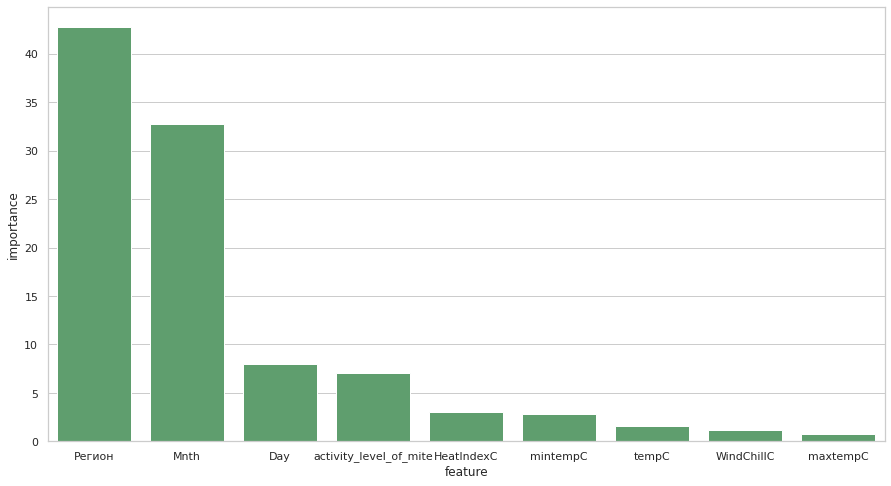

In [193]:
a4_dims = (15, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.set(font_scale=1)
sns.set_theme(style="whitegrid")
sns.barplot(x = feat_importance['feature'], y = feat_importance['importance'], color='g');

## Making Submission

In [204]:
final_model = CatBoostRegressor(
    loss_function='MultiRMSE',
    bootstrap_type =  'Bernoulli',
    learning_rate =  0.075,
    max_depth =  7,
    num_trees =  888,
    reg_lambda =  40,
    subsample = 0.75,
    min_child_samples = 5
)

final_model.fit(train_list, target,
         cat_features=catboost_cat_features)

0:	learn: 69.1255848	total: 81.4ms	remaining: 1m 12s
1:	learn: 67.2731322	total: 150ms	remaining: 1m 6s
2:	learn: 65.2692617	total: 184ms	remaining: 54.4s
3:	learn: 63.4657692	total: 246ms	remaining: 54.4s
4:	learn: 61.9922581	total: 313ms	remaining: 55.3s
5:	learn: 60.4733319	total: 388ms	remaining: 57s
6:	learn: 58.9990368	total: 464ms	remaining: 58.4s
7:	learn: 57.8039190	total: 553ms	remaining: 1m
8:	learn: 56.6491169	total: 641ms	remaining: 1m 2s
9:	learn: 55.6254247	total: 722ms	remaining: 1m 3s
10:	learn: 54.6525203	total: 793ms	remaining: 1m 3s
11:	learn: 53.6859894	total: 872ms	remaining: 1m 3s
12:	learn: 52.8728502	total: 964ms	remaining: 1m 4s
13:	learn: 52.0799844	total: 1.04s	remaining: 1m 4s
14:	learn: 51.3166958	total: 1.1s	remaining: 1m 4s
15:	learn: 50.5802619	total: 1.13s	remaining: 1m 1s
16:	learn: 49.8955932	total: 1.19s	remaining: 1m 1s
17:	learn: 49.3593363	total: 1.3s	remaining: 1m 2s
18:	learn: 48.7816380	total: 1.37s	remaining: 1m 2s
19:	learn: 48.2192765	total

159:	learn: 38.4513675	total: 13.6s	remaining: 1m 1s
160:	learn: 38.4492997	total: 13.7s	remaining: 1m 2s
161:	learn: 38.4485732	total: 13.9s	remaining: 1m 2s
162:	learn: 38.4431166	total: 14s	remaining: 1m 2s
163:	learn: 38.4385805	total: 14.1s	remaining: 1m 2s
164:	learn: 38.4255540	total: 14.2s	remaining: 1m 2s
165:	learn: 38.4111871	total: 14.3s	remaining: 1m 2s
166:	learn: 38.4083805	total: 14.4s	remaining: 1m 2s
167:	learn: 38.3931237	total: 14.5s	remaining: 1m 2s
168:	learn: 38.3854393	total: 14.6s	remaining: 1m 2s
169:	learn: 38.3755847	total: 14.8s	remaining: 1m 2s
170:	learn: 38.3601325	total: 14.9s	remaining: 1m 2s
171:	learn: 38.3490549	total: 15s	remaining: 1m 2s
172:	learn: 38.3369872	total: 15.1s	remaining: 1m 2s
173:	learn: 38.3165043	total: 15.3s	remaining: 1m 2s
174:	learn: 38.2965116	total: 15.4s	remaining: 1m 2s
175:	learn: 38.2773406	total: 15.5s	remaining: 1m 2s
176:	learn: 38.2772222	total: 15.6s	remaining: 1m 2s
177:	learn: 38.2771199	total: 15.7s	remaining: 1m 

317:	learn: 36.6772579	total: 32.8s	remaining: 58.8s
318:	learn: 36.6621283	total: 32.9s	remaining: 58.7s
319:	learn: 36.6558701	total: 33s	remaining: 58.6s
320:	learn: 36.6509848	total: 33.2s	remaining: 58.6s
321:	learn: 36.6390370	total: 33.3s	remaining: 58.5s
322:	learn: 36.6212137	total: 33.4s	remaining: 58.5s
323:	learn: 36.6194943	total: 33.6s	remaining: 58.4s
324:	learn: 36.6149124	total: 33.7s	remaining: 58.3s
325:	learn: 36.6028906	total: 33.8s	remaining: 58.2s
326:	learn: 36.5954811	total: 33.9s	remaining: 58.2s
327:	learn: 36.5947861	total: 34s	remaining: 58.1s
328:	learn: 36.5906847	total: 34.1s	remaining: 58s
329:	learn: 36.5757661	total: 34.3s	remaining: 58s
330:	learn: 36.5721177	total: 34.4s	remaining: 57.9s
331:	learn: 36.5585056	total: 34.5s	remaining: 57.8s
332:	learn: 36.5442596	total: 34.7s	remaining: 57.8s
333:	learn: 36.5439706	total: 34.8s	remaining: 57.7s
334:	learn: 36.5426752	total: 34.9s	remaining: 57.6s
335:	learn: 36.5348610	total: 35s	remaining: 57.6s
336

474:	learn: 35.2635784	total: 52s	remaining: 45.2s
475:	learn: 35.2630071	total: 52.1s	remaining: 45.1s
476:	learn: 35.2453574	total: 52.2s	remaining: 45s
477:	learn: 35.2444257	total: 52.3s	remaining: 44.9s
478:	learn: 35.2335514	total: 52.5s	remaining: 44.8s
479:	learn: 35.2282380	total: 52.6s	remaining: 44.7s
480:	learn: 35.2140656	total: 52.7s	remaining: 44.6s
481:	learn: 35.2064400	total: 52.8s	remaining: 44.5s
482:	learn: 35.1944408	total: 53s	remaining: 44.4s
483:	learn: 35.1806189	total: 53.1s	remaining: 44.3s
484:	learn: 35.1734046	total: 53.2s	remaining: 44.2s
485:	learn: 35.1661852	total: 53.3s	remaining: 44.1s
486:	learn: 35.1544641	total: 53.5s	remaining: 44s
487:	learn: 35.1515211	total: 53.6s	remaining: 43.9s
488:	learn: 35.1454021	total: 53.7s	remaining: 43.8s
489:	learn: 35.1393740	total: 53.8s	remaining: 43.7s
490:	learn: 35.1384732	total: 53.9s	remaining: 43.6s
491:	learn: 35.1289420	total: 54.1s	remaining: 43.5s
492:	learn: 35.1251852	total: 54.2s	remaining: 43.4s
4

630:	learn: 34.0534457	total: 1m 11s	remaining: 28.9s
631:	learn: 34.0501487	total: 1m 11s	remaining: 28.8s
632:	learn: 34.0491724	total: 1m 11s	remaining: 28.7s
633:	learn: 34.0479038	total: 1m 11s	remaining: 28.6s
634:	learn: 34.0343195	total: 1m 11s	remaining: 28.5s
635:	learn: 34.0337689	total: 1m 11s	remaining: 28.4s
636:	learn: 34.0275167	total: 1m 11s	remaining: 28.3s
637:	learn: 34.0255978	total: 1m 11s	remaining: 28.2s
638:	learn: 34.0177368	total: 1m 11s	remaining: 28s
639:	learn: 34.0098942	total: 1m 12s	remaining: 27.9s
640:	learn: 34.0088566	total: 1m 12s	remaining: 27.8s
641:	learn: 34.0030000	total: 1m 12s	remaining: 27.7s
642:	learn: 33.9922375	total: 1m 12s	remaining: 27.6s
643:	learn: 33.9852671	total: 1m 12s	remaining: 27.5s
644:	learn: 33.9773836	total: 1m 12s	remaining: 27.4s
645:	learn: 33.9719949	total: 1m 12s	remaining: 27.3s
646:	learn: 33.9646860	total: 1m 12s	remaining: 27.2s
647:	learn: 33.9588968	total: 1m 13s	remaining: 27.1s
648:	learn: 33.9514290	total: 

784:	learn: 33.1141273	total: 1m 29s	remaining: 11.7s
785:	learn: 33.1077785	total: 1m 29s	remaining: 11.6s
786:	learn: 33.0998803	total: 1m 29s	remaining: 11.5s
787:	learn: 33.0948887	total: 1m 29s	remaining: 11.4s
788:	learn: 33.0940769	total: 1m 29s	remaining: 11.3s
789:	learn: 33.0912007	total: 1m 30s	remaining: 11.2s
790:	learn: 33.0860980	total: 1m 30s	remaining: 11.1s
791:	learn: 33.0725028	total: 1m 30s	remaining: 10.9s
792:	learn: 33.0664119	total: 1m 30s	remaining: 10.8s
793:	learn: 33.0571529	total: 1m 30s	remaining: 10.7s
794:	learn: 33.0492128	total: 1m 30s	remaining: 10.6s
795:	learn: 33.0485060	total: 1m 30s	remaining: 10.5s
796:	learn: 33.0408524	total: 1m 30s	remaining: 10.4s
797:	learn: 33.0294992	total: 1m 30s	remaining: 10.3s
798:	learn: 33.0195561	total: 1m 31s	remaining: 10.1s
799:	learn: 33.0093845	total: 1m 31s	remaining: 10s
800:	learn: 33.0025957	total: 1m 31s	remaining: 9.92s
801:	learn: 32.9970959	total: 1m 31s	remaining: 9.8s
802:	learn: 32.9896223	total: 1

In [ ]:
# print(f'MAE score is {mean_absolute_error(y_train, catboost_gs.best_estimator_.predict(x_train))}')
# print(f'MAE score is {mean_absolute_error(y_test, catboost_gs.best_estimator_.predict(x_test))}')

In [205]:
final_predictions = model.predict(test_list)
final_predictions

array([[-0.35932526,  0.69706438,  0.20818027, ..., -0.04636771,
         1.15525747,  0.04646202],
       [-0.15978147,  0.68434567,  0.078644  , ..., -0.03328014,
         1.73950285,  0.21515159],
       [-0.15418046,  1.0679817 ,  0.01539306, ..., -0.26782667,
         0.99172999, -0.26457391],
       ...,
       [-0.27068169,  0.28196838, -0.14725309, ..., -0.01097701,
         2.00641998,  0.41640688],
       [ 0.08298762, -0.05066014, -0.10755924, ...,  0.0614918 ,
         0.37081601, -0.17457263],
       [ 0.17686408,  1.42493189, -0.13622428, ...,  0.3356539 ,
         2.47795608,  0.31467044]])

In [207]:
submission = pd.DataFrame(data=final_model_predictions, columns=[targett])
submission

,Anaplasma Phagocytophillum(кач) ДНК,Borrelia burgdorferi s.l (кач) ДНК,Borrelia miyamotoi (кач) ДНК,Ehrlichia muris/chaffeеnsis(кач) ДНК,Вирус клещевого энцефалита(кач) РНК,Anaplasma Phagocytophillum(кач) ДНК positive,Borrelia burgdorferi s.l (кач) ДНК positive,Borrelia miyamotoi (кач) ДНК positive,Ehrlichia muris/chaffeеnsis(кач) ДНК positive,Вирус клещевого энцефалита(кач) РНК positive
0,-0.359325,0.697064,0.208180,-0.356274,0.552293,1.210915,20.745861,-0.046368,1.155257,0.046462
1,-0.159781,0.684346,0.078644,-0.160903,0.510053,0.608766,19.920134,-0.033280,1.739503,0.215152
2,-0.154180,1.067982,0.015393,-0.155513,0.883226,-0.126192,16.499051,-0.267827,0.991730,-0.264574
3,-0.266421,0.570847,0.150339,-0.267659,0.332508,-0.129507,21.786245,-0.037247,0.742401,-0.188383
4,-0.012789,1.068135,0.083184,-0.011481,0.875587,-0.202130,20.852122,0.079716,1.398411,-0.071481
...,...,...,...,...,...,...,...,...,...,...
1268,74.945604,111.659333,21.107570,74.988735,111.724879,1.419691,35.427136,3.145075,4.036569,1.109739
1269,-0.360279,0.138589,-0.053697,-0.364521,0.023209,-0.263936,12.962647,0.299023,1.175316,0.071415
1270,-0.270682,0.281968,-0.147253,-0.268747,0.083083,0.458438,15.877756,-0.010977,2.006420,0.416407
1271,0.082988,-0.050660,-0.107559,0.082839,-0.081308,-0.278312,13.454376,0.061492,0.370816,-0.174573


In [209]:
np.save('pred_catboost.npy', final_predictions)